# Tratamento de Dados de Renda - SICLI
## Retirar outliers
--- 
Importar a biblioteca Pandas para manipulação dos dados em formato tabular.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import datetime 

In [2]:
pd.set_option('float_format', '{:0.2f}'.format)

In [3]:
arquivo = '../../../dados/amostra_sicli_tratada/cli_renda_amostra_regras_tratamento.csv'
sep = ';'

In [4]:
df_renda = pd.read_csv(arquivo, sep=sep)

In [5]:
features = ['nu_pessoa', 'dt_nascimento', 'ic_tipo_renda', 'vr_renda_bruta', 
            'vr_renda_liquida', 'ic_infmo_renda', 'dt_apuracao_renda', 
            'ic_sexo', 'ic_situacao', 'ic_inconsistencia', 'nu_estdo_civil_p27']

### Tratar **`outliers`** em **`vr_renda_bruta`** e **`vr_renda_liquida`**
- Registros com **`renda = 0`** serão desconsiderados
#### Função para gerar gráficos de análise de outliers

In [6]:
def diagnostic_number_plots(df):
    for v in df:
        if pd.api.types.is_numeric_dtype(df[v]) == True:
            # define figure size
            plt.figure(figsize=(16, 4))

            # histogram
            plt.subplot(1, 3, 1)
            sns.distplot(df[v], bins=30)
            plt.title('Histogram')

            # Q-Q plot
            plt.subplot(1, 3, 2)
            stats.probplot(df[v], dist="norm", plot=plt)
            plt.ylabel(v+' quantiles')

            # boxplot
            plt.subplot(1, 3, 3)
            sns.boxplot(y=df[v])
            plt.title('Boxplot')

            plt.show()

Análise do estado dos dados **antes** de retirar os **`outliers`**.

In [7]:
df_renda[features].describe(include=[np.number], percentiles=[.01,.05,.10,.25,.5,.75,.9,.95,.99])

,nu_pessoa,vr_renda_bruta,vr_renda_liquida,ic_infmo_renda,dt_apuracao_renda,ic_situacao,nu_estdo_civil_p27
count,2382027.00,1723692.00,1723692.00,2382027.00,2382027.00,2382027.00,2382027.00
mean,4950430472468.04,2000.32,4892532.38,2.69,136509.99,1.00,2.87
std,2880379170668.77,1383560.12,1984579786.37,2.18,94090.87,0.00,3.03
min,10000040001.00,0.00,0.00,0.00,0.00,1.00,0.00
1%,110028333031.00,0.00,0.00,0.00,0.00,1.00,0.00
5%,480034202048.00,0.00,0.00,0.00,0.00,1.00,0.00
10%,990196939699.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,2420002277742.00,0.00,0.00,0.00,0.00,1.00,1.00
50%,4940022509494.00,120.00,393.03,2.00,201006.00,1.00,1.00
75%,7470168257747.00,1000.00,1045.00,5.00,201711.00,1.00,5.00


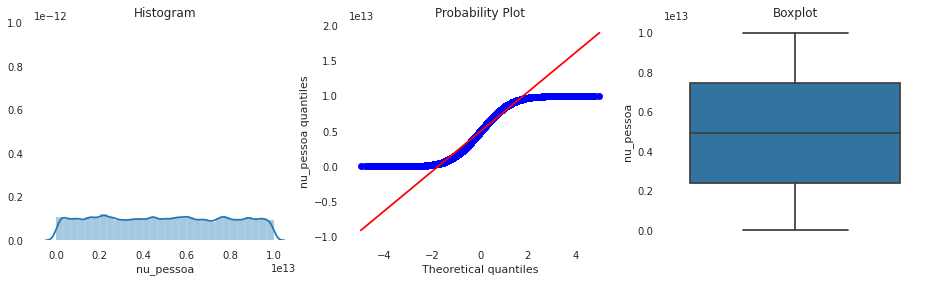

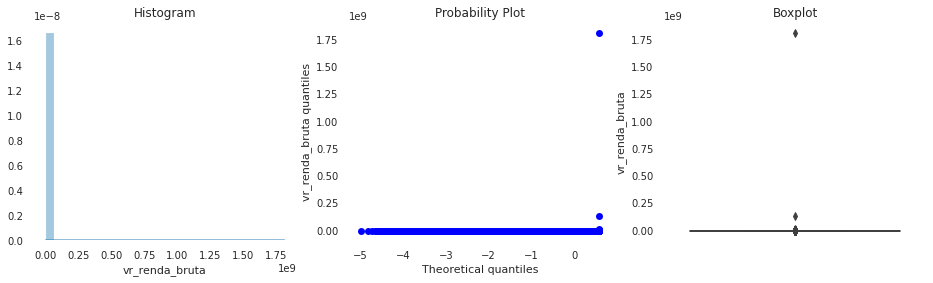

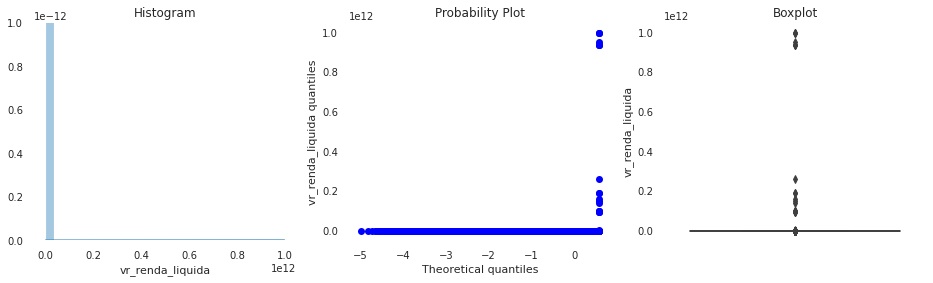

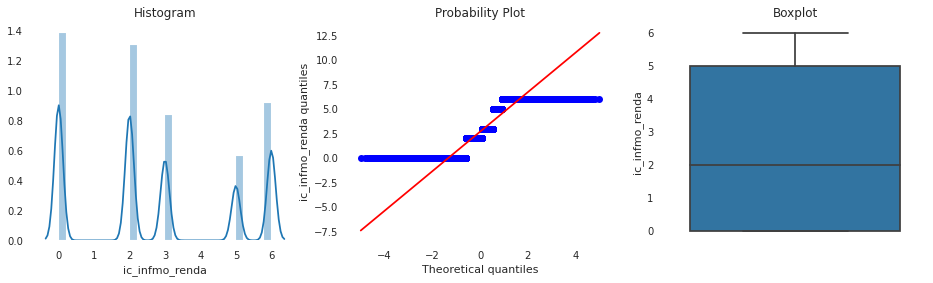

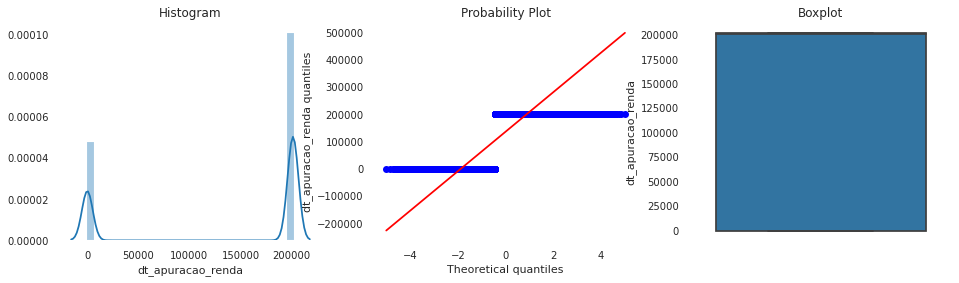

/home/marcello/anaconda3/envs/av/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


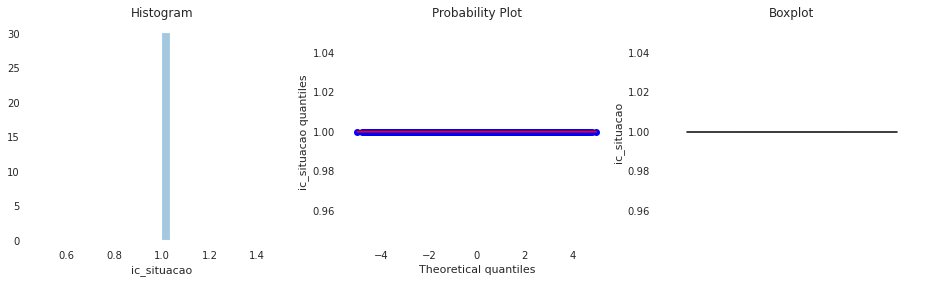

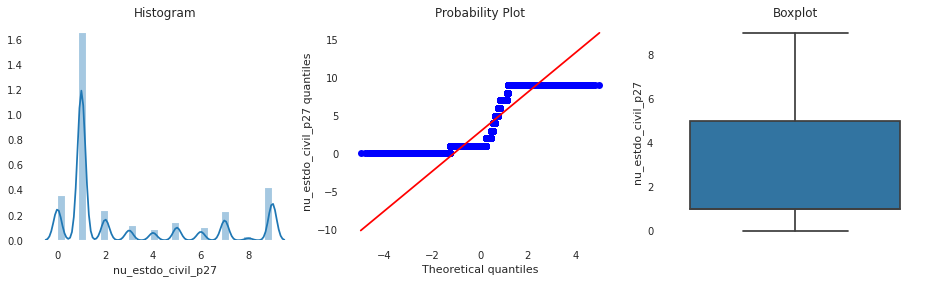

In [8]:
diagnostic_number_plots(df_renda[features])

#### Valores `NaN` serão convertidos para `0`

In [9]:
df_renda['vr_renda_bruta'].fillna(0,inplace=True)
df_renda['vr_renda_liquida'].fillna(0,inplace=True)

In [10]:
print('Qtd:   %s' % df_renda[['vr_renda_bruta']][df_renda['vr_renda_bruta']==0].count())
print('Qtd: %s' % df_renda[['vr_renda_liquida']][df_renda['vr_renda_liquida']==0].count())

Qtd:   vr_renda_bruta    1495556
dtype: int64
Qtd: vr_renda_liquida    1298842
dtype: int64


- É bem significativa a quantidade de registros que contém **`0`** em renda bruta e líquida;
- Portanto, os registros com **`0`** serão retirados para que a dispersão não seja enviezada a menor e, assim, os registros ficam sem distorções sobre as rendas.

Retirar os casos de **`renda = 0`**

In [11]:
df_sem_renda = df_renda[df_renda['vr_renda_bruta'] > 0]
df_renda[['vr_renda_bruta']] = df_renda[['vr_renda_bruta']][df_renda['vr_renda_bruta'] > 0]

In [12]:
df_sem_renda = df_renda[df_renda['vr_renda_liquida'] > 0]
df_renda[['vr_renda_liquida']] = df_renda[['vr_renda_liquida']][df_renda['vr_renda_liquida'] > 0]

In [13]:
df_sem_renda.to_csv('../../../dados/amostra_sicli_tratada/cli_SEM_renda_amostra_regras_tratamento.csv', 
                index=False, encoding='utf-8', sep=';')

del df_sem_renda

Distribuição por percentil **após** desconsiderar **`renda = 0`**

In [14]:
df_renda[features].describe(include=[np.number], percentiles=[.01,.05,.10,.25,.5,.75,.9,.95,.99])

,nu_pessoa,vr_renda_bruta,vr_renda_liquida,ic_infmo_renda,dt_apuracao_renda,ic_situacao,nu_estdo_civil_p27
count,2382027.00,886471.00,1083185.00,2382027.00,2382027.00,2382027.00,2382027.00
mean,4950430472468.04,3889.50,7785575.80,2.69,136509.99,1.00,2.87
std,2880379170668.77,1929280.13,2503492946.23,2.18,94090.87,0.00,3.03
min,10000040001.00,0.01,0.01,0.00,0.00,1.00,0.00
1%,110028333031.00,2.00,1.00,0.00,0.00,1.00,0.00
5%,480034202048.00,200.00,180.00,0.00,0.00,1.00,0.00
10%,990196939699.00,260.00,259.55,0.00,0.00,1.00,0.00
25%,2420002277742.00,510.00,500.00,0.00,0.00,1.00,1.00
50%,4940022509494.00,998.00,950.00,2.00,201006.00,1.00,1.00
75%,7470168257747.00,1700.00,1500.00,5.00,201711.00,1.00,5.00


### Como serão tratados os outliers?
Valores **`x%` acima** do `terceiro quartil` e os valores **`x%` abaixo** do `segundo quartil` **serão considerados** `outliers`.  

Função que calcula o **`limite superior`** dos **`outlier`**.

In [15]:
def find_boundaries_upper(df, variable, distance):
    # distance: std = 0.1 até 3.0

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary

Função que calcula o **`limite inferior`** dos **`outlier`**.

In [16]:
def find_boundaries_lower(df, variable, distance):
    # distance: std = 0.1 até 3.0

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)

    return lower_boundary

Parametrização dos **`outliers`** em **`renda bruta`** por porcentagem **acima** e **abaixo** do **desvio padrão**.

In [17]:
vr_renda_bruta_upper_limit = find_boundaries_upper(df_renda,'vr_renda_bruta', 16.0)
vr_renda_bruta_lower_limit = find_boundaries_lower(df_renda,'vr_renda_bruta', 0.325)

vr_renda_bruta_upper_limit, vr_renda_bruta_lower_limit

(20740.0, 123.25)

Parametrização dos **`outliers`** em **`renda líquida`** por porcentagem **acima** e **abaixo** do **desvio padrão**.

In [18]:
vr_renda_liquida_upper_limit = find_boundaries_upper(df_renda,'vr_renda_liquida', 16.0)
vr_renda_liquida_lower_limit = find_boundaries_lower(df_renda,'vr_renda_liquida', 0.4)

vr_renda_liquida_upper_limit, vr_renda_liquida_lower_limit

(17500.0, 100.0)

In [19]:
df_trimmed = df_renda[
                (df_renda['vr_renda_liquida']>=vr_renda_liquida_lower_limit) & 
                (df_renda['vr_renda_bruta']>=vr_renda_bruta_lower_limit) & 
                (df_renda['vr_renda_liquida']<=vr_renda_liquida_upper_limit) & 
                (df_renda['vr_renda_bruta']<=vr_renda_bruta_upper_limit)
            ].reset_index(drop=True)

### Relatório após tratar missing values

In [20]:
df_trimmed[features].describe(include=[np.number], percentiles=[.01,.05,.10,.25,.5,.75,.9,.95,.99])

,nu_pessoa,vr_renda_bruta,vr_renda_liquida,ic_infmo_renda,dt_apuracao_renda,ic_situacao,nu_estdo_civil_p27
count,835991.00,835991.00,835991.00,835991.00,835991.00,835991.00,835991.00
mean,4914522210464.35,1527.84,1345.13,5.07,175046.16,1.00,3.33
std,2878561908344.43,1820.83,1498.79,1.17,67680.86,0.00,3.14
min,10000055001.00,123.25,100.00,2.00,0.00,1.00,0.00
1%,100141328010.00,180.00,179.99,3.00,0.00,1.00,0.00
5%,490057752549.00,240.00,240.00,3.00,0.00,1.00,0.00
10%,990098518099.00,300.00,300.00,3.00,0.00,1.00,1.00
25%,2370117891237.00,595.26,545.00,5.00,200001.00,1.00,1.00
50%,4880131055488.00,1000.00,954.00,6.00,201408.00,1.00,1.00
75%,7430047723743.00,1752.70,1522.45,6.00,201808.00,1.00,6.00


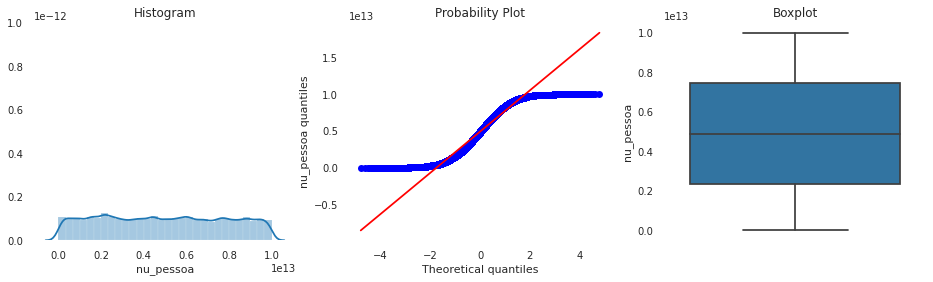

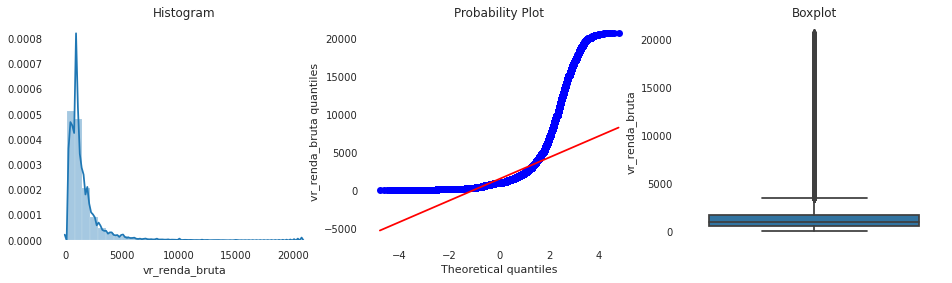

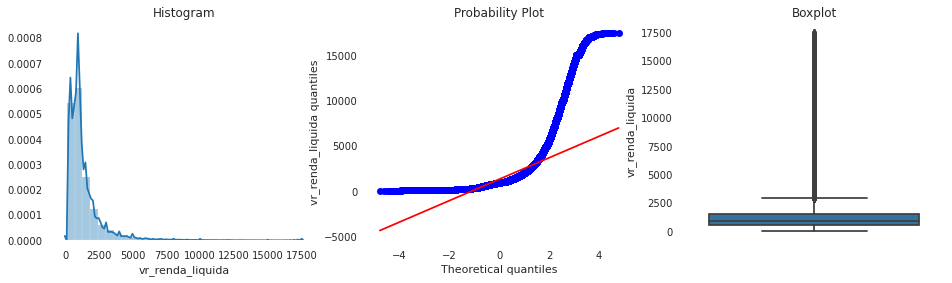

In [21]:
diagnostic_number_plots(df_trimmed[['nu_pessoa','vr_renda_bruta','vr_renda_liquida']])

In [22]:
#(df_renda['vr_renda_bruta']>50000).sum()
df_renda[df_renda['vr_renda_bruta']>50000]

,nu_pessoa,dt_nascimento,ic_tipo_renda,vr_renda_bruta,vr_renda_liquida,ic_infmo_renda,dt_apuracao_renda,ic_sexo,ic_situacao,ic_inconsistencia,nu_estdo_civil_p27,idade,valido
687,4290074123429,1985-01-29,F,196711.63,196711.63,6.00,201807,M,1,N,1,35,True
3843,1290148111129,1987-01-31,F,117809.82,117809.82,6.00,202002,M,1,N,1,33,True
6049,7170164403717,1982-01-13,F,50241.00,50241.00,6.00,202001,M,1,N,1,38,True
9531,6560046378656,1971-05-28,F,183031.17,183031.17,6.00,201807,M,1,N,9,49,True
10894,1140077732114,1972-07-04,F,68000.00,57244.53,6.00,201703,M,1,N,1,48,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2368476,210006054021,1955-07-21,F,62841.05,21593.73,6.00,202001,F,1,S,7,65,False
2371020,6640042709664,1970-12-10,F,70700.00,70700.00,5.00,200001,F,1,S,2,49,False
2371832,3080007764308,1971-05-02,F,90000.00,70000.00,6.00,202004,M,1,S,8,49,False
2372830,1780000073178,1933-11-22,F,110000.00,110000.00,5.00,200001,F,1,S,0,86,False


In [23]:
(df_trimmed['vr_renda_bruta']>12000).sum()

5088

In [24]:
df_trimmed['vr_renda_bruta'].max()

20735.0

### Gerar arquivo **sem `outliers`** em renda bruta e renda líquida.

In [25]:
df_renda[features].to_csv('../../../dados/amostra_sicli_tratada/cli_renda_amostra_MG_validos_sem_outliers.csv',
                              index=False, encoding='utf-8', sep=';')

In [26]:
df_trimmed.corr(method='pearson')

,nu_pessoa,vr_renda_bruta,vr_renda_liquida,ic_infmo_renda,dt_apuracao_renda,ic_situacao,nu_estdo_civil_p27,idade,valido
nu_pessoa,1.00,-0.01,-0.01,0.00,0.00,nan,-0.01,-0.01,0.02
vr_renda_bruta,-0.01,1.00,0.95,0.19,0.04,nan,0.11,-0.11,0.08
vr_renda_liquida,-0.01,0.95,1.00,0.16,0.01,nan,0.11,-0.09,0.05
ic_infmo_renda,0.00,0.19,0.16,1.00,0.03,nan,-0.02,-0.23,0.11
dt_apuracao_renda,0.00,0.04,0.01,0.03,1.00,nan,-0.01,0.01,0.46
ic_situacao,nan,nan,nan,nan,nan,nan,nan,nan,nan
nu_estdo_civil_p27,-0.01,0.11,0.11,-0.02,-0.01,nan,1.00,0.20,-0.02
idade,-0.01,-0.11,-0.09,-0.23,0.01,nan,0.20,1.00,-0.33
valido,0.02,0.08,0.05,0.11,0.46,nan,-0.02,-0.33,1.00


In [27]:
df_trimmed.skew()

nu_pessoa             0.04
vr_renda_bruta        4.20
vr_renda_liquida      4.08
ic_infmo_renda       -0.95
dt_apuracao_renda    -2.20
ic_situacao           0.00
nu_estdo_civil_p27    0.81
idade                 0.49
valido               -0.32
dtype: float64

In [28]:
df_trimmed.describe()

,nu_pessoa,vr_renda_bruta,vr_renda_liquida,ic_infmo_renda,dt_apuracao_renda,ic_situacao,nu_estdo_civil_p27,idade
count,835991.00,835991.00,835991.00,835991.00,835991.00,835991.00,835991.00,835991.00
mean,4914522210464.35,1527.84,1345.13,5.07,175046.16,1.00,3.33,51.54
std,2878561908344.43,1820.83,1498.79,1.17,67680.86,0.00,3.14,19.00
min,10000055001.00,123.25,100.00,2.00,0.00,1.00,0.00,18.00
25%,2370117891237.00,595.26,545.00,5.00,200001.00,1.00,1.00,37.00
50%,4880131055488.00,1000.00,954.00,6.00,201408.00,1.00,1.00,49.00
75%,7430047723743.00,1752.70,1522.45,6.00,201808.00,1.00,6.00,64.00
max,9990238382999.00,20735.00,17500.00,6.00,202006.00,1.00,9.00,110.00
